### LOAD PACKAGES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'Georgia' , 'font.size': 14 , 'mathtext.fontset' : 'stix'}),
import cv2   # CATCH CIRCLE, READ IMAGE 
# import pandas as pd
# import math
# from IPython.display import Markdown, display, Math, Latex

### CATCH THE CIRCLE TO ALIGN ALL PICTURES

In [66]:
# A. READ IMAGE
numPic = 1
lst = np.arange(1,11)

for numPic in lst :
    
    FileName = 'Edges%d'%numPic;
   
    img = cv2.imread(('/Users/wissam/Wissam/DATA/SUIVIS TEMPORELS/6:12_CRAIE_1H20/Traitement Images/Profil/Z.Edges/'+ FileName + '.jpg') , 0);   # IMAGE READ
    img[img > 5] = 255;   # image where greater than 5 become white

# B. DETECT CIRCLES
    dp = 1;   minDist = 100;   param1 = 55;   param2 = 10;   minRadius = 6;   maxRadius = 10;
    detected_circles = cv2.HoughCircles(img , cv2.HOUGH_GRADIENT , dp = dp , 
                                    minDist = minDist , param1 = param1 , param2 = param2 , 
                                    minRadius = minRadius , maxRadius = maxRadius);
    print('In total we found : ' + str(len(detected_circles[0])) + ' posibilities.')
    display(detected_circles)

# C. PICK THE ONE IN GOOD RANGE ([250,400,600,750] -> (new coordinates) [600,850,800,980]) ---> SHOULD BE ONLY ONE IN THE END
    pos = np.where( (850 >= detected_circles[0][:,0]) & (detected_circles[0][:,0] >= 600) & (detected_circles[0][:,1] >= 800) & (980 >= detected_circles[0][:,1]));
    detected_circles_final = detected_circles[0][pos[0][0]];
    print('\nFinal option : ') 
    display(detected_circles_final)

# D. EXPORT AS NEW IMAGE
    Img_New = img[round(detected_circles_final[1]) - 400:round(detected_circles_final[1]) + 500 , round(detected_circles_final[0]) - 200 : round(detected_circles_final[0]) + 1100]
    display(Img_New.shape)
    cv2.imwrite(('/Users/wissam/Wissam/DATA/SUIVIS TEMPORELS/6:12_CRAIE_1H20/Traitement Images/Profil/New/'+ FileName + '_out.jpg'), Img_New)
    
    
    
    
    
    
    


In total we found : 7 posibilities.


array([[[4785.5,   79.5,    9.4],
        [ 762.5,  904.5,    9.4],
        [5213.5,  164.5,    8.2],
        [ 114.5,   10.5,    7.1],
        [ 793.5,  146.5,    8.2],
        [ 251.5, 1054.5,    9.4],
        [5042.5,  788.5,    7.1]]], dtype=float32)


Final option : 


array([762.5, 904.5,   9.4], dtype=float32)

(900, 1300)

In total we found : 4 posibilities.


array([[[ 695.5,  911.5,    9.4],
        [4785.5,   79.5,    9.4],
        [1254.5,  182.5,    8.2],
        [5213.5,  164.5,    8.2]]], dtype=float32)


Final option : 


array([695.5, 911.5,   9.4], dtype=float32)

(900, 1300)

In total we found : 3 posibilities.


array([[[ 657.5,  918.5,    9.4],
        [4785.5,   79.5,    9.4],
        [5213.5,  164.5,    8.2]]], dtype=float32)


Final option : 


array([657.5, 918.5,   9.4], dtype=float32)

(900, 1300)

In total we found : 3 posibilities.


array([[[ 657.5,  916.5,    9.4],
        [4785.5,   79.5,    9.4],
        [5213.5,  164.5,    8.2]]], dtype=float32)


Final option : 


array([657.5, 916.5,   9.4], dtype=float32)

(900, 1300)

In total we found : 5 posibilities.


array([[[ 663.5,  913.5,    9.4],
        [4785.5,   79.5,    9.4],
        [ 139.5, 1076.5,    8.2],
        [5213.5,  164.5,    8.2],
        [ 247.5,  131.5,    7.1]]], dtype=float32)


Final option : 


array([663.5, 913.5,   9.4], dtype=float32)

(900, 1300)

In total we found : 4 posibilities.


array([[[ 666.5,  932.5,    9.3],
        [4785.5,   79.5,    9.4],
        [5213.5,  164.5,    8.2],
        [ 215.5,   23.5,    7.1]]], dtype=float32)


Final option : 


array([666.5, 932.5,   9.3], dtype=float32)

(900, 1300)

In total we found : 4 posibilities.


array([[[4785.5,   79.5,    9.4],
        [5213.5,  164.5,    8.2],
        [ 664.5,  909.5,    7.1],
        [1931.5,  869.5,    6.9]]], dtype=float32)


Final option : 


array([664.5, 909.5,   7.1], dtype=float32)

(900, 1300)

In total we found : 4 posibilities.


array([[[ 670.5,  933.5,    8.2],
        [4785.5,   79.5,    9.4],
        [  84.5,   17.5,    9.4],
        [5213.5,  164.5,    8.2]]], dtype=float32)


Final option : 


array([670.5, 933.5,   8.2], dtype=float32)

(900, 1300)

In total we found : 4 posibilities.


array([[[4785.5,   79.5,    9.4],
        [5213.5,  164.5,    8.2],
        [ 662.5,  927.5,    7.1],
        [ 163.5, 1070.5,    9.4]]], dtype=float32)


Final option : 


array([662.5, 927.5,   7.1], dtype=float32)

(900, 1300)

In total we found : 4 posibilities.


array([[[ 673.5,  923.5,    9.4],
        [4785.5,   79.5,    9.4],
        [5213.5,  164.5,    8.2],
        [ 187.5, 1038.5,    9.4]]], dtype=float32)


Final option : 


array([673.5, 923.5,   9.4], dtype=float32)

(900, 1300)

In [68]:
display(Img_New.shape)

(900, 1300)

### FIGURE : CHECK IF IT IS WELL CAPTURED

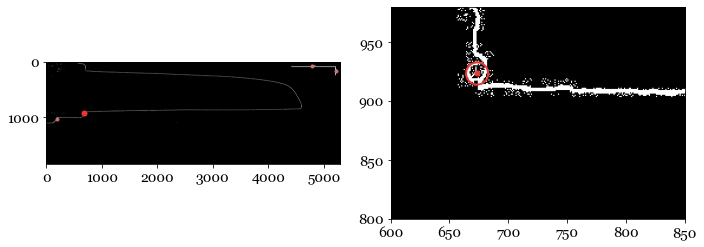

In [69]:
fig, ax = plt.subplots(1,2,figsize = (10,5))
# FIGURE(1) : FULL SCALE
ax[0].imshow(img , cmap = 'gray')
ax[0].plot(detected_circles[0][:,0] , detected_circles[0][:,1] , 'o' , markersize = 3 , color = '#C77676')
ax[0].plot(detected_circles_final[0] , detected_circles_final[1] , 'o' , markersize = 5 , color = '#EC3636')

# FIGURE(2) : ZOOM IN SCALE 
ax[1].imshow(img , cmap = 'gray')
ax[1].plot(detected_circles_final[0] , detected_circles_final[1] , 'o' , markersize = 5 , color = '#EC3636')
ax[1].axis([600,850,800,980])
circle = plt.Circle((detected_circles_final[0] , detected_circles_final[1]) , detected_circles_final[2] , color = '#EC3636' , fill = False , lw = 2.0)
ax[1].add_patch(circle)

fig.tight_layout()

### RELOAD AND SHOW

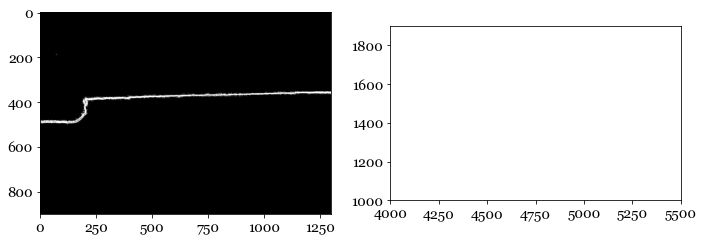

In [70]:
# READ IMAGE
FileName = 'Edges1';
frame0 = cv2.imread('/Users/wissam/Wissam/DATA/SUIVIS TEMPORELS/6:12_CRAIE_1H20/Traitement Images/Profil/New/' + FileName + '_out.jpg' , 0)

# LONG EXPOSURE
numPics = 2;
for numPics in [2,3]:
    frame1 = cv2.imread('/Users/wissam/Wissam/DATA/SUIVIS TEMPORELS/6:12_CRAIE_1H20/Traitement Images/Profil/New/Edges%d_out.jpg' % numPics  , 0)
    frame0 = np.maximum(frame0 , frame1);

# IMAGE SHOW
fig, ax = plt.subplots(1,2,figsize = (10,5))
ax[0].imshow(frame0 , cmap = 'gray')
ax[1].imshow(frame0 , cmap = 'gray')
ax[1].axis([4000,5500,1000,1900])
fig.tight_layout()